> **Citation**: The data used in this exercise is derived from [Student Performance Data Set](http://archive.ics.uci.edu/ml/datasets/Student+Performance).

## Explore the Data

In [44]:
import pandas as pd

# load the training dataset
student_mat_data = pd.read_csv('../data/student-mat.csv', sep=';')
student_mat_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### The data consists of the following columns:

Attribute Information:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
these grades are related with the course subject, Math or Portuguese:
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

In [4]:
numeric_features = ['absences', 'age', 'G1', 'G2']
student_mat_data[numeric_features + ['G3']].describe()

,absences,age,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,5.708861,16.696203,10.908861,10.713924,10.415190
std,8.003096,1.276043,3.319195,3.761505,4.581443
min,0.000000,15.000000,3.000000,0.000000,0.000000
25%,0.000000,16.000000,8.000000,9.000000,8.000000
50%,4.000000,17.000000,11.000000,11.000000,11.000000
75%,8.000000,18.000000,13.000000,13.000000,14.000000
max,75.000000,22.000000,19.000000,19.000000,20.000000


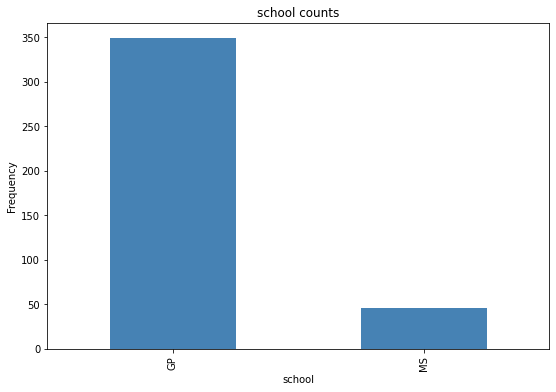

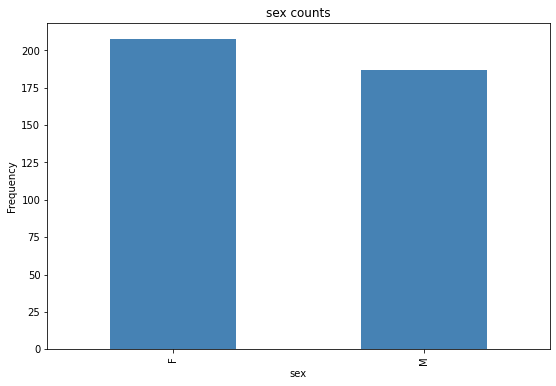

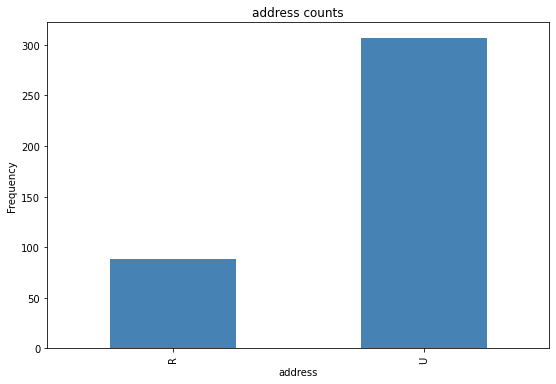

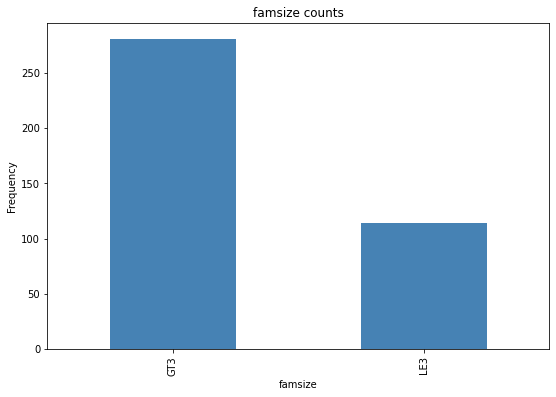

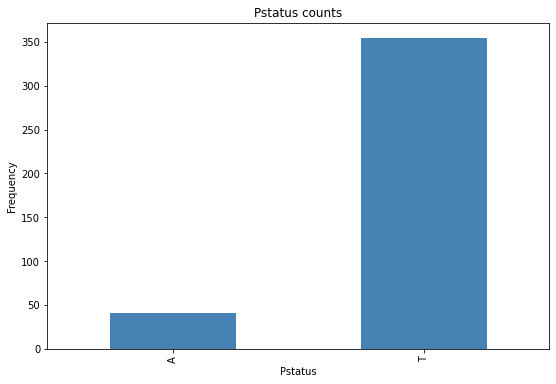

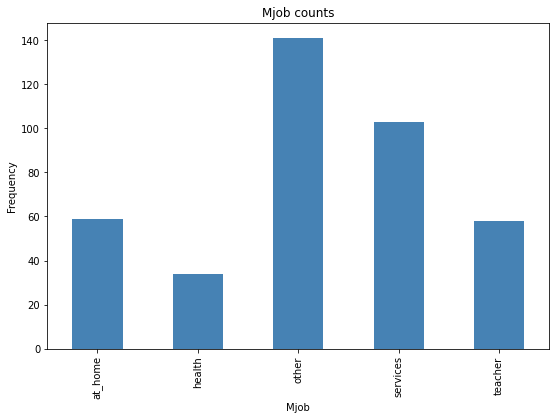

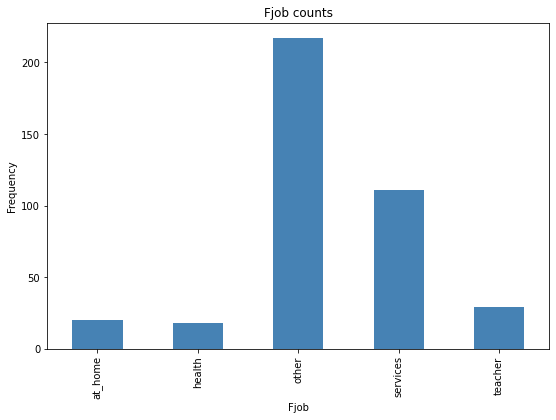

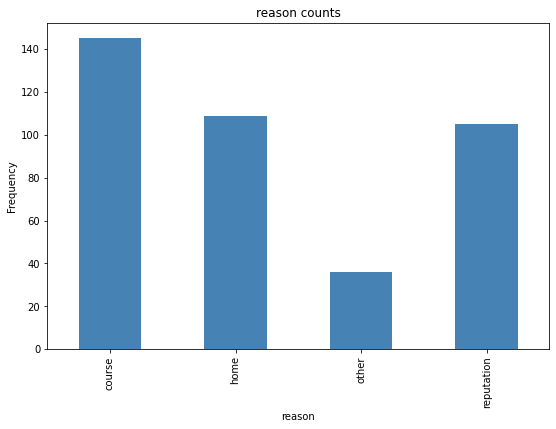

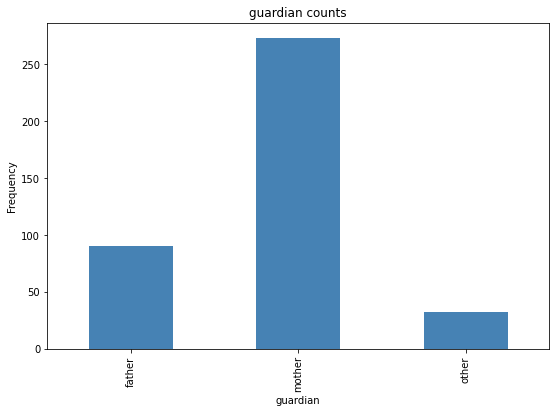

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# plot a bar plot for each categorical feature count
categorical_features = ['school','sex','address','famsize','Pstatus','Mjob', 'Fjob', 'reason', 'guardian']

for col in categorical_features:
    counts = student_mat_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

One Hot Encoding of all Nominal Columns

In [ ]:
final = pd.get_dummies(student_mat_data,columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian'])
final

K-1 OneHotEncoding to avoid Multicollinearity and the Dummy Variable Trap
Multicollinearity occurs when two or more independent variables (a.k.a. features) in the dataset are correlated with each other.
See this post:
https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a

drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

In [ ]:
finalk1 = pd.get_dummies(student_mat_data,columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian'],drop_first=True)
finalk1

In [ ]:
final.dtypes

In [ ]:
finalk1.dtypes

### Export Dataframe to csv

In [46]:
final.to_csv(r'../data/output/student-mat-ohe.csv', index = False)
finalk1.to_csv(r'../data/output/student-mat-ohe-k1.csv', index = False)


## The Azure Machine Learning Python SDK

You can run pretty much any Python code in a notebook, provided the required Python packages are installed in the environment where you're running it. In this case, you're running the notebook in a *Conda* environment on an Azure Machine Learning compute instance. This environment is installed in the compute instance by default, and contains common Python packages that data scientists typically work with. It also includes the Azure Machine Learning Python SDK, which is a Python package that enables you to write code that uses resources in your Azure Machine Learning workspace.

Run the cell below to import the **azureml-core** package and checking the version of the SDK that is installed.

In [35]:
import azureml.core

print("Ready to use Azure ML", azureml.core.VERSION)

Ready to use Azure ML 1.34.0


In [36]:
from azureml.core import Workspace

ws = Workspace.from_config()
print(ws.name, "loaded")

vienna loaded


## View Azure Machine Learning resources in the workspace

Now that you have a connection to your workspace, you can work with the resources. For example, you can use the following code to enumerate the compute resources in your workspace.

In [37]:
print("Compute Resources:")
for compute_name in ws.compute_targets:
    compute = ws.compute_targets[compute_name]
    print("\t", compute.name, ':', compute.type)

Compute Resources:
	 cpuautoml2core : AmlCompute
	 jupyterandrstudio : ComputeInstance
	 designer : AmlCompute
	 automl : AmlCompute
	 amldemo : ComputeInstance


## Work with datastores

In Azure ML, *datastores* are references to storage locations, such as Azure Storage blob containers. Every workspace has a default datastore - usually the Azure storage blob container that was created with the workspace. If you need to work with data that is stored in different locations, you can add custom datastores to your workspace and set any of them to be the default.

### View datastores

Run the following code to determine the datastores in your workspace:

In [40]:
# Get the default datastore
default_ds = ws.get_default_datastore()

# Enumerate all datastores, indicating which is the default
for ds_name in ws.datastores:
    print(ds_name, "- Default =", ds_name == default_ds.name)

amldemocitelos - Default = False
workspaceartifactstore - Default = False
sparky - Default = False
odsdatamartbronze - Default = False
axondata - Default = False
covid19enhanced - Default = False
synapticjunction - Default = False
azureml_globaldatasets - Default = False
synapticjunctionadls - Default = False
workspacefilestore - Default = False
workspaceblobstore - Default = True


### Upload data to a datastore

Now that you have determined the available datastores, you can upload files from your local file system to a datastore so that it will be accessible to experiments running in the workspace, regardless of where the experiment script is actually being run.

In [ ]:
default_ds.upload_files(files=['../data/output/student-mat-ohe.csv'], # Upload the csv files in /data
                       target_path='student-ohe-data/', # Put it in a folder path in the datastore
                       overwrite=True, # Replace existing files of the same name
                       show_progress=True)

In [ ]:


default_ds.upload_files(files=['../data/output/student-mat-ohe-k1.csv'], # Upload the csv files in /data
                       target_path='student-ohe-k1-data/', # Put it in a folder path in the datastore
                       overwrite=True, # Replace existing files of the same name
                       show_progress=True)

## Work with datasets

Azure Machine Learning provides an abstraction for data in the form of *datasets*. A dataset is a versioned reference to a specific set of data that you may want to use in an experiment. Datasets can be *tabular* or *file*-based.

### Create a tabular dataset

Let's create a dataset from the diabetes data you uploaded to the datastore, and view the first 20 records. In this case, the data is in a structured format in a CSV file, so we'll use a *tabular* dataset.

In [ ]:
from azureml.core import Dataset

# Get the default datastore
default_ds = ws.get_default_datastore()

#Create a tabular dataset from the path on the datastore (this may take a short while)
tab_data_set = Dataset.Tabular.from_delimited_files(path=(default_ds, 'student-ohe-data/*.csv'))

# Display the first 20 rows as a Pandas dataframe
tab_data_set.take(20).to_pandas_dataframe()

In [ ]:
#Create a tabular dataset from the path on the datastore (this may take a short while)
tab_data_set2 = Dataset.Tabular.from_delimited_files(path=(default_ds, 'student-ohe-k1-data/*.csv'))

# Display the first 20 rows as a Pandas dataframe
tab_data_set2.take(20).to_pandas_dataframe()

### Register datasets

Now that you have created datasets that reference the diabetes data, you can register them to make them easily accessible to any experiment being run in the workspace.

We'll register the tabular dataset as **diabetes dataset**, and the file dataset as **diabetes files**.

In [49]:
# Register the tabular datasetbbb
try:
    tab_data_set = tab_data_set.register(workspace=ws, 
                                        name='student ohe dataset',
                                        description='student data with one hot encoding',
                                        tags = {'format':'CSV'},
                                        create_new_version=True)
except Exception as ex:
    print(ex)

In [ ]:
# Register the tabular datasetbbb
try:
    tab_data_set2 = tab_data_set2.register(workspace=ws, 
                                        name='student ohe k1 dataset',
                                        description='student data with one hot encoding k1',
                                        tags = {'format':'CSV'},
                                        create_new_version=True)
except Exception as ex:
    print(ex)

You can view and manage datasets on the **Datasets** page for your workspace in [Azure Machine Learning studio](https://ml.azure.com). You can also get a list of datasets from the workspace object:

In [ ]:
print("Datasets:")
for dataset_name in list(ws.datasets.keys()):
    dataset = Dataset.get_by_name(ws, dataset_name)
    print("\t", dataset.name, 'version', dataset.version)

Note: Their is a koalas.get_dummies in databricks https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.get_dummies.html